In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Reviews.csv')

# Print the first few rows
print(df.head())

# Print the column names
print(df.columns)


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [14]:
# Drop rows with missing values
df = df.dropna()

# Check the column names again
print(df.columns)

# Convert 'time' column if it exists
if 'Timestamp' in df.columns:
    df['Time'] = pd.to_datetime(df['Timestamp'], unit='s')
elif 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Print the dataframe to ensure the conversion was successful
print(df.head())


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'sentiment'],
      dtype='object')
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score       Time  \
0                     1                       1      5 2011-04-27   
1                     0                       0      1 2012-09-07   
2                     1                       1      4 2008-08-18   
3                     3                       3      2 2011-06-13   
4                     0                       0

In [15]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('amazon_reviews.db')

# Save the cleaned data back to the SQL database
df.to_sql('reviews', conn, if_exists='replace', index=False)

# Verify data saved in database
saved_df = pd.read_sql('SELECT * FROM reviews', conn)
print(saved_df.head())

conn.close()


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score                 Time  \
0                     1                       1      5  2011-04-27 00:00:00   
1                     0                       0      1  2012-09-07 00:00:00   
2                     1                       1      4  2008-08-18 00:00:00   
3                     3                       3      2  2011-06-13 00:00:00   
4                     0                       0      5  2012-10-21 00:00:00   

                 Summary                                               Text  \
0  Good Quality Dog Food 

In [16]:
import pandas as pd
import sqlite3

# Load the dataset
df = pd.read_csv('Reviews.csv')

# Print the first few rows to inspect the data
print(df.head())

# Print the column names
print(df.columns)

# Drop rows with missing values
df = df.dropna()

# Convert 'time' column to datetime
if 'Timestamp' in df.columns:
    df['Time'] = pd.to_datetime(df['Timestamp'], unit='s')
elif 'time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Print the dataframe to ensure the conversion was successful
print(df.head())

# Connect to SQLite database
conn = sqlite3.connect('amazon_reviews.db')

# Save the cleaned data back to the SQL database
df.to_sql('reviews', conn, if_exists='replace', index=False)

# Verify data saved in database
saved_df = pd.read_sql('SELECT * FROM reviews', conn)
print(saved_df.head())

conn.close()


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [17]:
from textblob import TextBlob
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('amazon_reviews.db')

# Load the cleaned data
df = pd.read_sql('SELECT * FROM reviews', conn)

# Perform sentiment analysis
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Example queries for top-rated products
top_rated_query = '''
SELECT Productid, AVG(score) as avg_score
FROM reviews
GROUP BY Productid
ORDER BY avg_score DESC
LIMIT 10;
'''
top_rated_df = pd.read_sql(top_rated_query, conn)

# Print top-rated products
print(top_rated_df)

# Most common themes in reviews (word frequency)
from collections import Counter
import re

all_reviews = ' '.join(df['Text'].values)
words = re.findall(r'\w+', all_reviews.lower())
common_words = Counter(words).most_common(20)

conn.close()

# Print common words
print(common_words)


    ProductId  avg_score
0  B009WVB40S        5.0
1  B009WSNWC4        5.0
2  B009UUS05I        5.0
3  B009SR4OQ2        5.0
4  B009SF0TN6        5.0
5  B009RSR8HO        5.0
6  B009RE0Y5G        5.0
7  B009PIEW3O        5.0
8  B009PICJTS        5.0
9  B009PIAFTE        5.0
[('the', 1872563), ('i', 1691750), ('and', 1289715), ('a', 1235894), ('it', 1073807), ('to', 1015457), ('of', 802069), ('is', 734354), ('this', 674763), ('br', 647087), ('for', 552578), ('in', 547932), ('my', 463886), ('that', 454254), ('but', 376328), ('you', 369926), ('with', 353181), ('have', 345479), ('not', 335105), ('are', 319010)]


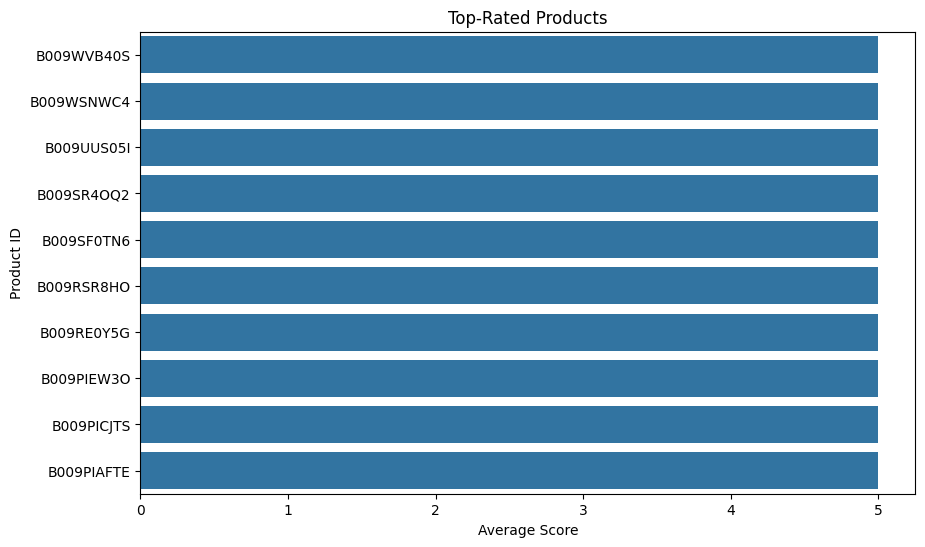

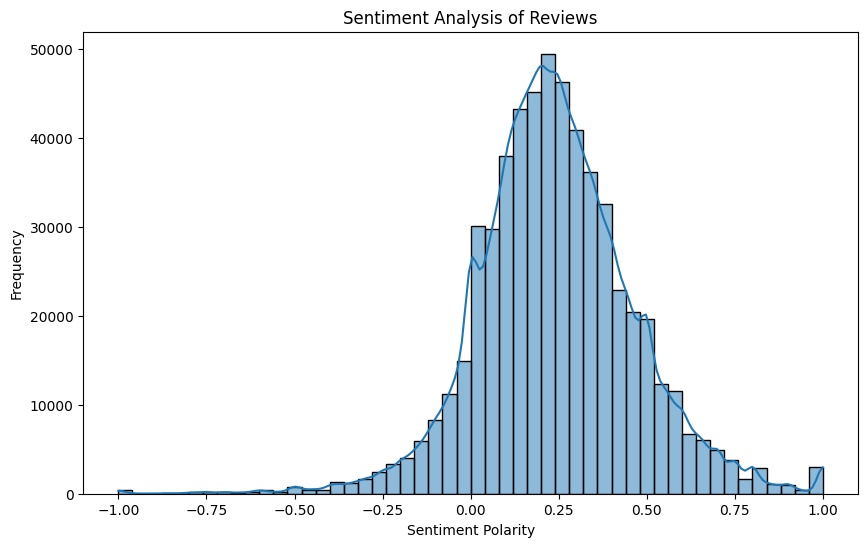

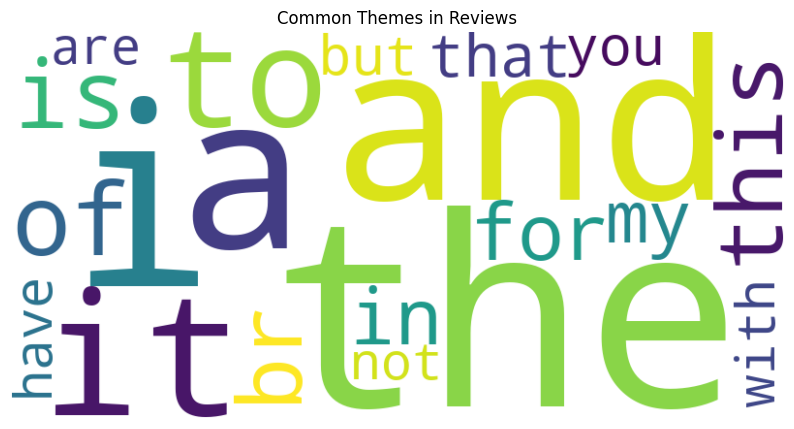

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Top-rated products visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated_df, x='avg_score', y='ProductId')
plt.title('Top-Rated Products')
plt.xlabel('Average Score')
plt.ylabel('Product ID')
plt.show()

# Sentiment analysis distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Word cloud for common themes in reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Themes in Reviews')
plt.show()
